In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time, json, os, csv

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

# Hi Markers, please use your onw API keys to run the script, thank you!
from api_keys import weather_api_key
from api_keys import g_key

In [3]:
# Define function to set data type
def set_integer(data_types, pddf):
    for row in data_types:
        pddf[row] = pddf[row].astype(int)

# integer = int

In [4]:
# Read data files
house_data_path = "data_source/Melbourne_housing_FULL.csv"
school_data_path = "data_source/dv309_schoollocations2021.csv"
crime_rate_path = "data_source/Data_Tables_LGA_Criminal_Incidents_Year_Ending_March_2021.xlsx"

house_data = pd.read_csv(house_data_path)
school_data = pd.read_csv(school_data_path, encoding = "cp1252")
crime_data = df = pd.read_excel (crime_rate_path, sheet_name = "Table 03")

# Set output file path
house_file = "data_source/cleaned_source_data/house_cleaned.csv"
school_file = "data_source/cleaned_source_data/school_cleaned.csv"
crime_file = "data_source/cleaned_source_data/crime_cleaned.csv"

In [5]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# cleaning house data
house_data_cleaned = house_data.dropna(subset = ["Price"])
house_data_cleaned = house_data_cleaned.drop(["Bedroom2"], axis = "columns")
house_data_cleaned = house_data_cleaned.fillna(0)

# Set up a list for data type
column_list = ["Postcode",
               "Bathroom",
               "Car",
               "Landsize",
               "BuildingArea",
               "YearBuilt",
               "Propertycount",
               "Rooms"]

set_integer(column_list, house_data_cleaned)

#house_data_cleaned["Price"] = house_data_cleaned.apply(lambda x: "{:,.0f}".format(x["Price"]), axis = 1)

In [7]:
house_data_cleaned.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,2,1,94,0,0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [8]:
number_house_in_each_suburb= house_data_cleaned["Suburb"].value_counts()
number_house_in_each_suburb

Reservoir          727
Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
                  ... 
croydon              1
Tecoma               1
Cranbourne East      1
Yarra Glen           1
Kalkallo             1
Name: Suburb, Length: 345, dtype: int64

In [9]:
df = house_data_cleaned[['Suburb','Type','Price','Distance']].groupby(['Suburb']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.head()

,Price,Distance
Suburb,,
Abbotsford,1033549.02,2.70
Aberfeldie,1307192.86,8.30
Airport West,751364.25,11.90
Albanvale,536055.56,14.00
Albert Park,1927650.54,3.18


Text(0, 0.5, 'House Price by Suburb (in Million)')

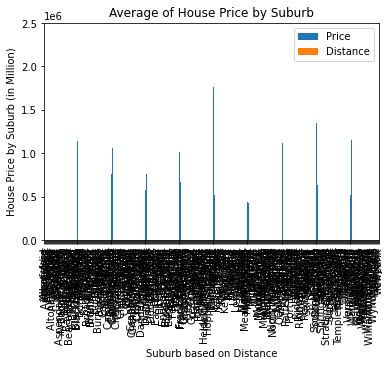

In [10]:
x= df["Distance"]
y= df["Price"]/1000000
ax= df.plot(kind='bar',width=0.1, align="edge", title="Average of House Price by Suburb")
ax.set_xlabel("Suburb based on Distance")
ax.set_ylabel("House Price by Suburb (in Million)")

Text(0, 0.5, 'House Price by Suburb (in Million)')

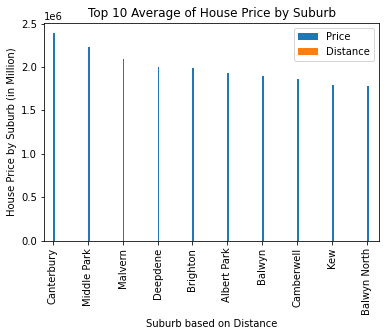

In [11]:
top_ten_df= df.sort_values(by="Price", ascending=False).head(10)

x= top_ten_df["Distance"]
y= top_ten_df["Price"]/1000000

ax= top_ten_df.plot(kind='bar',width=0.1, align="edge", title="Top 10 Average of House Price by Suburb")
ax.set_xlabel("Suburb based on Distance")
ax.set_ylabel("House Price by Suburb (in Million)")

<Figure size 432x288 with 0 Axes>

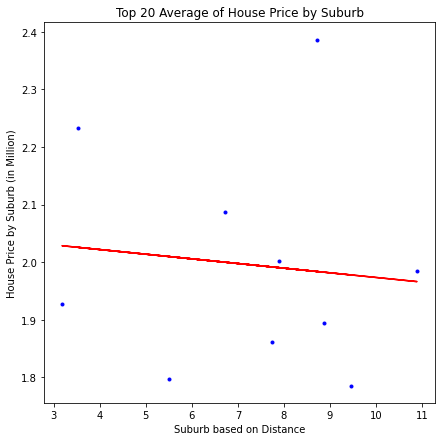

In [14]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)

line = slope * x + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig = plt.figure()
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x, y, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(x, line, 'r-')
plt.title("Top 10 Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/Suburb_Price.png")
plt.savefig(file)
plt.show()

In [ ]:
suburb_price_distance_grouped_df = house_data_cleaned[['Suburb','Type','Price','Distance']].groupby(['Suburb','Type']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
suburb_price_distance_grouped_df.head()

Price  Distance
Suburb     Type                     
Abbotsford h    1221023.44      2.70
           t    1041500.00      2.58
           u     657109.38      2.73
Aberfeldie h    1578846.94      8.28
           t    1195000.00      8.46